# Auto-fit MP using Kernel Density Estimator (KDE) and Optimizer (i.e LM Fit)

We can get a simple MP fit for any empirical ESD $\rho_{emp}(\lambda)$ by 

1. representing the density with a Kernel Density Estimator (KDE), using a linear kernel and a small bandwitdh

2. fitting the MP function automatically using the python LM alorithm, with $\sigma$ as a parameter

#### caveats

- the KDE estimator underestimates the cusp region, which may be sharp for small $Q\sim 1$, and/or for Power Laws.

- for long tailed $\rho_{emp}(\lambda)$, you may need a good initial estimate of both $\sigma$ and the  number of spikes, $\lambda_{k}>\lambda^{+}$

#### extras

- if we can auto-estimate 


#### Examples:  the AlexNet Fully Connected layers  (FC1, FC2, FC3)

distributed with pyTorch

We also compute the MP Soft Ranks $\mathcal{R}_{mp}$, all of which are $<<1$



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import scipy as sp
from scipy.linalg import svd

import powerlaw
from scipy import optimize
from sklearn.neighbors import KernelDensity

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing notebook from RMT_Util.ipynb


/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

In [4]:
alexnet = models.alexnet(pretrained=True)

### Marchenko Pastur Fit

## FC1 =  Layer 17

Recall in the paper, we zoomed in A LOT to fit this, but only dropped 3% of the eigenvalues

Because this pretty long tailed compared to MP


In [8]:
this_im = 17

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W17 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W17)
        
        u, sv, sh = svd(W17)
        
        evals17 = sv*sv
        break

Text(0.5,0,'Eigenvalues ($\\lambda$) of $\\mathbf{X}=\\mathbf{W}_{FC1}^{T}\\mathbf{W}_{FC1}$')

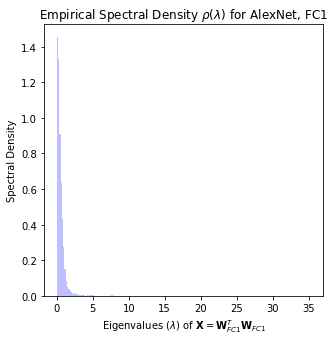

In [7]:
plt.hist(evals17, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"Empirical Spectral Density $\rho(\lambda)$ for AlexNet, FC1")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")

### AutoMated Fit w/KDE

Note:  We fit  $\rho_{emp}(\lambda)$ assuming 0 spikes, but zoom in by removing 5 spikes. this does not change the fit, it just makes the histogram more fine grained and easier to compare

#### Color code

- <font color='purple'>Histogram</font>

- <font color='red'>MP fit</font>

- <font color='blue'>KDE fit</font>




### MP fit with spikes=0   vs KDE fit with spikes=0

We compare how each model fits the cusp region (as shown with our histogram)

- The <font color='red'>MP Fit</font> over estimates the <font color='purple'>empirical density </font>near the cusp

- The <font color='blue'>KDE Fit</font> treats the <font color='purple'>the cusp </font> well, but the density is very coarse 

% spikes outside bulk 7.90
% sigma 0.7069


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


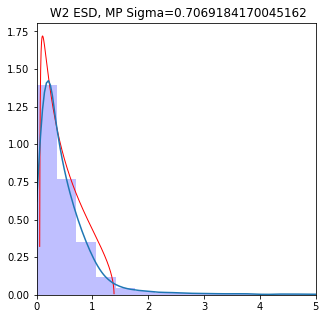

In [9]:
evals = evals17
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=300)
plt.xlim(0,5)

kde = KernelDensity(kernel='linear', bandwidth=0.25).fit(evals.reshape(-1, 1))
X_plot = np.linspace(0, np.max(evals), 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

### MP fit with spikes=5   vs KDE fit with spikes=5

We compare how each model fits the cusp region (as shown with our histogram)


- The <font color='red'>MP Fit</font> over estimates the <font color='purple'>empirical density </font>near the cusp

- The <font color='blue'>KDE Fit</font> over estimates <font color='purple'>the cusp </font>

% spikes outside bulk 21.26
% sigma 0.5358


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


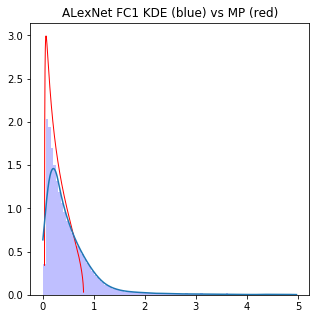

In [10]:
evals = evals17[evals17<5]
sigma = RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=700)
plt.title("ALexNet FC1 KDE (blue) vs MP (red)")

kde = KernelDensity(kernel='linear', bandwidth=0.25).fit(evals.reshape(-1, 1))
X_plot = np.linspace(0, np.max(evals), 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

### MP fit with spikes=100 , using the $\sigma=0.6852 $ taken from the better KDE fit (0 spikes)

Now the <font color='red'>MP fit</font> near the cusp is very good, 

but empirical density $\rho_{emp}(\lambda)$ near the bulk edge is missing mass

The implies FC1 is in the at least in the _Bulk Decay_ phase, or even _Heavy Tailed_

RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


% spikes outside bulk 2.57
% sigma 0.6852


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


Text(0.5,1,'MP fit to FC1, sigma auto-fit')

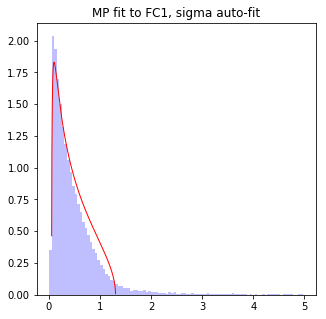

In [14]:
s1 = RMT_Util.fit_mp(evals17, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=100, sigma=s1)
plt.title("MP fit to FC1, sigma auto-fit")

### _Bulk Decay_ or _Heavy Tailed_  ?

$\mathcal{R}_{mp}\sim 0$ suggesting FC1 is _Heavy Tailed_ 



In [12]:
RMT_Util.calc_mp_soft_rank(evals=evals17,Q=Q, sigma=s1)

0.03698510432618632

### Auto-Mated MP fits using the KDE estimator, 0 spikes, for FC2 and FC3

- determine MP $\sigma$ from KDE fit and plot, overlay on Histogram

- also calculate $\mathcal{R}_{mp}$, which are $\sim 0$ 



In [25]:
this_im = 20

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W20 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W20)
        
        u, sv, sh = svd(W20)
        
        evals20 = sv*sv
        break

RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 2.57
% sigma 0.7045


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Utilility Library"


(0, 5)

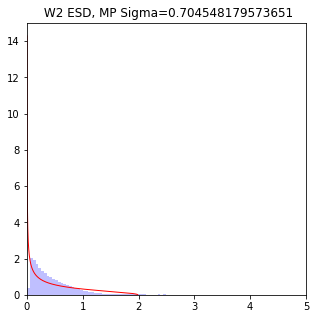

In [26]:
s1 = RMT_Util.fit_mp(evals20, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=100)
plt.xlim(0,5)

% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Utilility Library"


(0, 4)

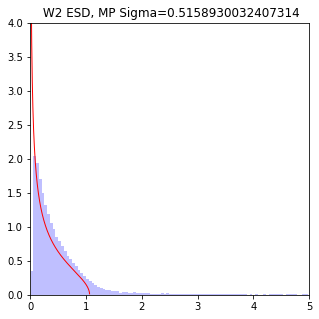

In [27]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, sigma=s1)
plt.xlim(0,5)
plt.ylim(0,4)

In [28]:
RMT_Util.calc_mp_soft_rank(evals=evals20,Q=Q, sigma=s1)

0.012307957559773031

### FC3

In [29]:
this_im = 22

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W22 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W22)
        
        u, sv, sh = svd(W22)
        
        evals22 = sv*sv
        break

% spikes outside bulk 11.11
% sigma 1.1007


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


(0, 10)

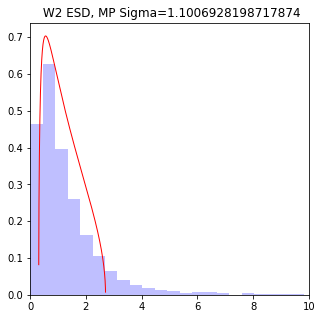

In [30]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals22, Q=Q, num_spikes=100)
plt.xlim(0,10)

RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [
RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


% spikes outside bulk 0.00
% sigma 0.9866


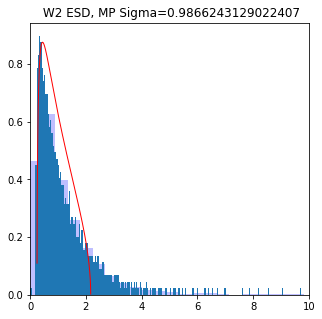

In [31]:
s1 = RMT_Util.fit_mp(evals22, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals22, Q=Q, sigma=s1)
plt.xlim(0,10)
plt.hist(evals22,bins=1000, density=True);

In [32]:
RMT_Util.calc_mp_soft_rank(evals=evals22,Q=Q, sigma=s1)

0.048742436345163495